In [1]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
%run analise.py

In [2]:
def z_mod(x, media,mad):
    m = (x - media) * 0.6745
    z_md = abs(m/mad)
    return float(z_md)

df = pd.read_csv("../data/logs2.csv",sep = ";")
ajeitando_df(df).head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


# Identificando outliers

In [3]:
# Criando um data frame apenas com os acessos
df_acessos = df[["usuario"]].apply(pd.value_counts)
df_acessos.columns = ["acessos"]
df_acessos.head()

,acessos
616329888599911591,5198
3952875937242617029,5089
-8964805488632447931,4513
710203151364569887,4428
260012301744219973,4043


In [4]:
# Coletando dados estatísticos do data frame dos acessos
df_acessos.describe()

,acessos
count,995.000000
mean,414.371859
std,640.225118
min,1.000000
25%,37.000000
50%,184.000000
75%,503.500000
max,5198.000000


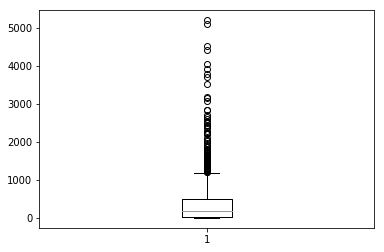

In [5]:
# Plotando o boxplot dos acessos
plt.boxplot(df_acessos["acessos"])
plt.show()

## Identificando possíveis outliers

In [6]:
media_acessos = df_acessos["acessos"].mean()
media_acessos

414.3718592964824

In [7]:
mediana_acessos = df_acessos["acessos"].median()
mediana_acessos

184.0

In [8]:
df_acessos["x-mediana"] = df_acessos["acessos"].apply(lambda x: abs(int(x) - mediana_acessos))
df_acessos.sort_values(by=['x-mediana'])

,acessos,x-mediana
-224930710256020865,184,0.0
-2121805090545450681,185,1.0
-6836071898683336601,185,1.0
-4015152259331783011,181,3.0
-4821534548982177369,181,3.0
-1059446735651333741,181,3.0
391057645280711829,180,4.0
8340291719543352165,190,6.0
7879483884156588471,190,6.0
-1331438138389589569,177,7.0


In [9]:
mad = df_acessos["x-mediana"].median()
mad

167.0

In [10]:
df_acessos["z_modificado"] = df_acessos["acessos"].apply(lambda x : z_mod(int(x),media_acessos,mad))
df_acessos

,acessos,x-mediana,z_modificado
616329888599911591,5198,5014.0,19.320702
3952875937242617029,5089,4905.0,18.880459
-8964805488632447931,4513,4329.0,16.554040
710203151364569887,4428,4244.0,16.210732
260012301744219973,4043,3859.0,14.655747
4010185481155475087,3924,3740.0,14.175115
-818095743421438535,3788,3604.0,13.625821
-8029875674051901993,3696,3512.0,13.254241
-7994420641407581993,3532,3348.0,12.591857
-7548620409216467497,3174,2990.0,11.145923


In [11]:
verificando_outliers = pd.DataFrame()
verificando_outliers["is_outlier"] = df_acessos["z_modificado"] > 3.5
usuarios_outliers = verificando_outliers[verificando_outliers.is_outlier].index.values.tolist()

In [12]:
outliers = df[df["usuario"].isin(usuarios_outliers)].dropna()
outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
87,27/01/2016,08:30:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
91,27/01/2016,08:40:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
96,27/01/2016,08:50:15,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
101,27/01/2016,09:00:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,9,manha,08h-10h,21
105,27/01/2016,09:00:49,lcc2-27,8851394046529841223,2016,1,27,Qua,9,manha,08h-10h,27


In [13]:
outliers.tail()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
412279,15/02/2018,14:11:18,lcc2-14,-8964805488632447931,2018,2,15,Qui,14,tarde,14h-16h,14
412280,15/02/2018,14:11:21,lcc2-13,5732212761568358315,2018,2,15,Qui,14,tarde,14h-16h,13
412285,15/02/2018,14:20:07,lcc2-23,1244840843434056831,2018,2,15,Qui,14,tarde,14h-16h,23
412291,15/02/2018,14:20:33,lcc2-32,5682070817617030239,2018,2,15,Qui,14,tarde,14h-16h,32
412293,15/02/2018,14:20:38,lcc2-19,-304601087665306731,2018,2,15,Qui,14,tarde,14h-16h,19


In [14]:
nao_outliers = df[~df["usuario"].isin(usuarios_outliers)].dropna()
nao_outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


In [15]:
df_sessao = pd.read_csv("../data/logs2Sessoes2.csv", sep=";").drop('Unnamed: 0', axis=1)
df_sessao = ajeitando_df(df_sessao)
df_sessao["outlier"] = False
mask = df_sessao["usuario"].isin(usuarios_outliers)
column_name = 'outlier'
df_sessao.loc[mask, column_name] = True

df_sessao_outlier = df_sessao.loc[df_sessao["outlier"] == True]
df_sessao_n_outlier = df_sessao.loc[df_sessao["outlier"] == False]

df_sessao.head()

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier
0,26/01/2016,15:21:01,lcc2-28,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28,False
1,26/01/2016,15:21:04,lcc2-29,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29,False
2,26/01/2016,15:30:55,lcc2-39,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39,False
3,26/01/2016,15:31:20,lcc2-09,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9,False
4,26/01/2016,15:31:23,lcc2-10,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10,False


## Plotando características

A partir dos outliers identificados pelo método acima usando a quantidade de acesso, foram gerados gráficos para o dia da semana e o intevalo de tempo comparando a quantidade de acessos dos outliers e não outliers.

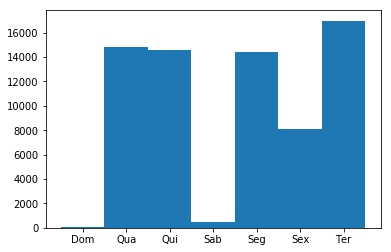

In [18]:
x = [i for i in range(8)]
plt.title("Acessos por dia da semana outliers")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df_sessao_outlier.dia_da_semana, bins = x,align="left")
plt.show()
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x,align="left")
plt.show()

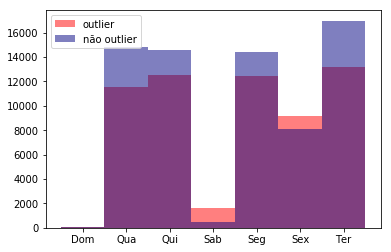

In [19]:
plt.hist(df_sessao_outlier.dia_da_semana, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper left')
plt.show()

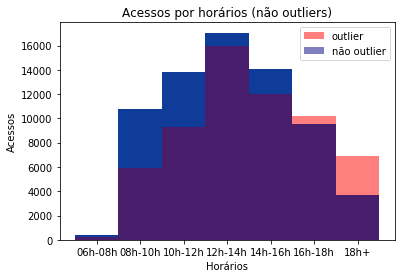

In [20]:
plt.title("Acessos por horários (não outliers)")
plt.xlabel("Horários")
plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.intervalo, bins = x,align ="left")
plt.hist(df_sessao_outlier.intervalo, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.intervalo, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper right')
plt.show()

Uma outra forma de qualificar outliers é verificando o tempo de sessão dos LCCs. Para isso foi criada uma função que varre o dataframe e agrupa os dados em sessões, adicionando uma nova informação, o tempo de sessão.

A partir disso, os usuários também foram separados em dois grupos: outliers e não outliers.

In [16]:
def intervalo_sessao(df):
    
    from datetime import datetime
    df_sessao_outlier["duracao"] = ""
    formato = "%H:%M:%S"
    data_anterior = ""
    maquina_anterior = ""
    sessao_anterior = ""
    hora_anterior = ""
    usuario_anterior = ""

    for index, logs in df.iterrows():
        if sessao_anterior == "opened":
            if logs["sessao"] == "closed" and logs["usuario"] == usuario_anterior and logs["maquina"] == maquina_anterior and logs["data"] == data_anterior:
                df.at[index, "duracao"] = (datetime.strptime(logs["hora"],formato) - (datetime.strptime(hora_anterior,formato)))
        if logs["sessao"] == "opened":
            sessao_anterior = "opened"
            data_anterior = logs["data"]
            maquina_anterior = logs["maquina"]
            hora_anterior = logs["hora"]
            usuario_anterior = logs["usuario"]
        else:
            sessao_anterior = "closed"
            data_anterior = ""
            maquina_anterior = ""
            sessao_anterior = ""
            hora_anterior = ""
            usuario_anterior = ""
            
    return df

In [17]:
# tempo de sessao do usuario considerado outlier pelo numero de acessos
df_sessao_outlier = intervalo_sessao(df_sessao_outlier)
df_duracao_sessao_outlier = df_sessao_outlier[df_sessao_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_outlier.head()

/home/livia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
56834,16/03/2016,lcc2-01,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,0:00:06
65646,08/08/2016,lcc2-12,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,0:00:08
5075,08/11/2016,lcc2-02,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
24907,08/11/2016,lcc2-02,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
35147,09/05/2016,lcc2-03,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,0:01:05


In [18]:
# tempo de sessao do usuario considerado nao outlier 
df_sessao_n_outlier = intervalo_sessao(df_sessao_n_outlier)
df_duracao_sessao_n_outlier = df_sessao_n_outlier[df_sessao_n_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_n_outlier.head()


/home/livia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/livia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/livia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,lcc2-15,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,lcc2-19,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,lcc2-05,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
103582,27/07/2016,lcc2-40,-7446963053336319563,2016,7,27,Qua,16,tarde,16h-18h,40,False,00:00:16
87938,11/08/2016,lcc2-03,-1442416312388872333,2016,8,11,Qui,9,manha,08h-10h,3,False,00:00:36


In [19]:
# calculando o tempo de sessao para todos os usuarios
df_geral = intervalo_sessao(df_sessao)
df_geral = df_geral[df_geral.duracao != ""].sort_values(by='duracao')
df_geral.head()

/home/livia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,12:21:09,lcc2-15,closed,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,14:00:35,lcc2-19,closed,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,14:32:53,lcc2-05,closed,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
56834,16/03/2016,18:01:49,lcc2-01,closed,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,00:00:06
65646,08/08/2016,14:41:53,lcc2-12,closed,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,00:00:08


Assim como anteriormente, foi visto o comportamento dos usuários em relação ao dia da semana e o horário de acesso, mas de forma um pouco distinta.

Aqui procuramos identificar o comportamento padrão dos usuários dos grupos vendo qual a frequência de acesso e entendendo melhor as características dos acessos.

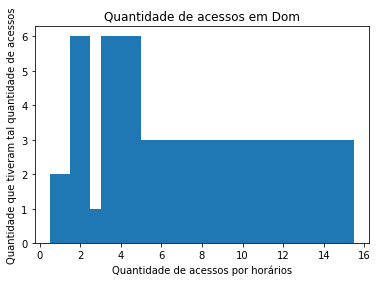

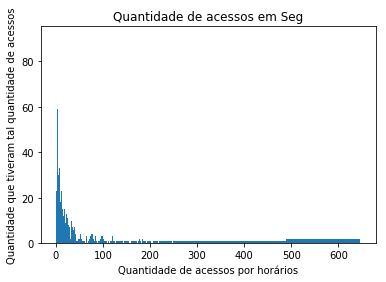

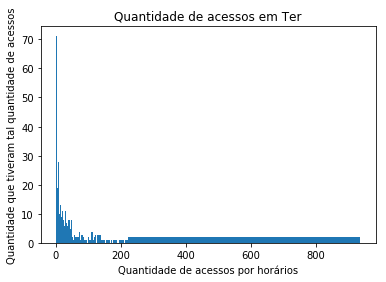

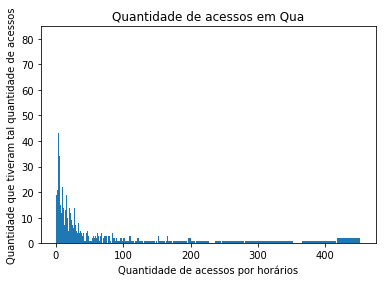

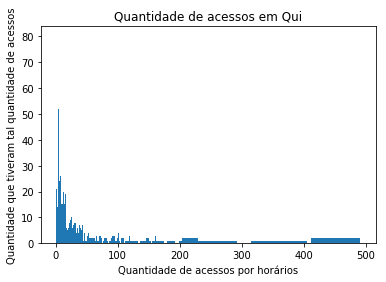

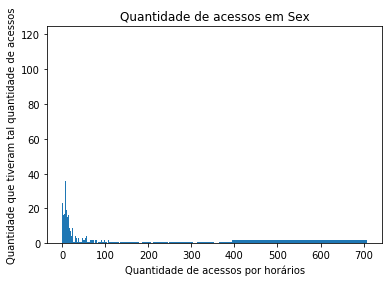

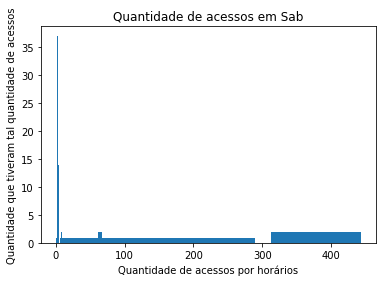

In [26]:
df_dia_semana = df_geral.groupby(['usuario','dia_da_semana']).count()
df_dia_semana.reset_index(inplace=True)
x = ['Dom','Seg','Ter','Qua','Qui','Sex','Sab']
for valor in x:
    plt.title("Quantidade de acessos em " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].maquina, bins = np.sort(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].data.unique()),align="left")
    plt.show()


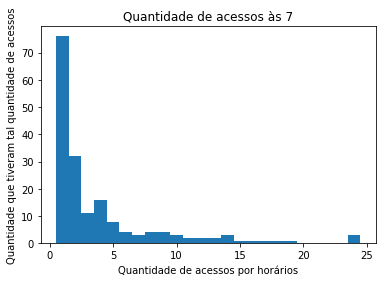

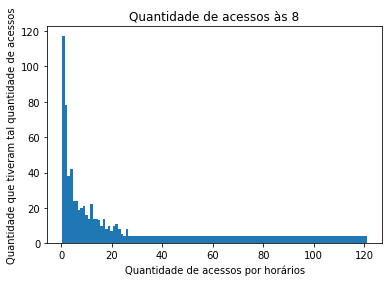

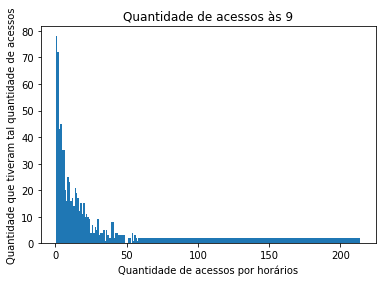

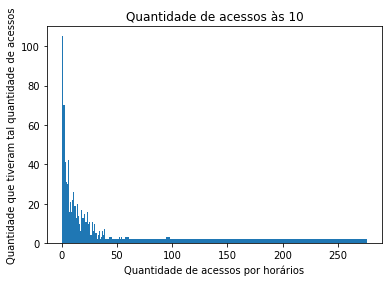

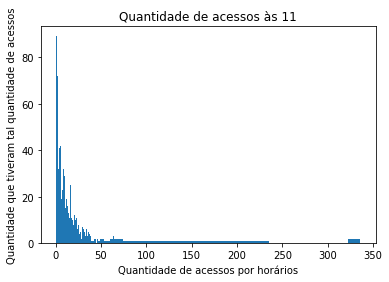

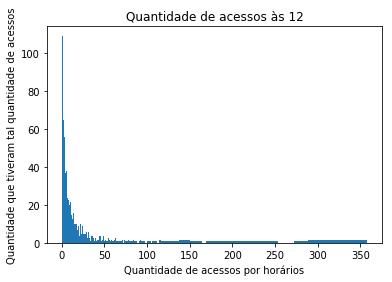

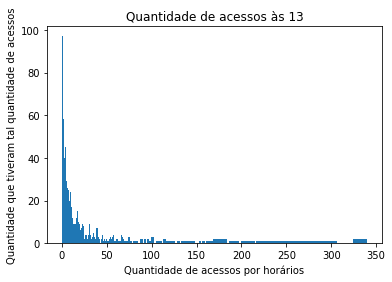

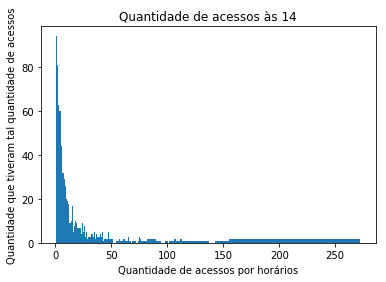

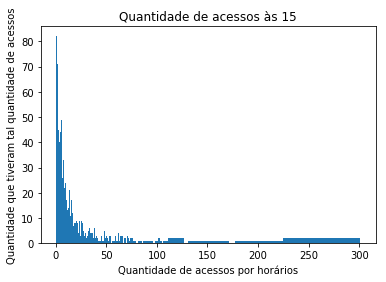

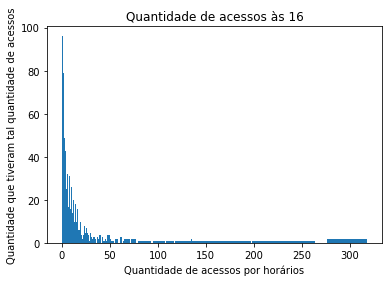

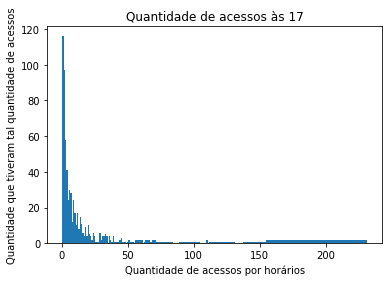

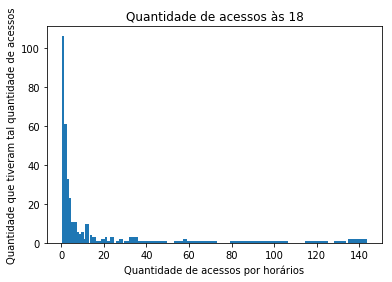

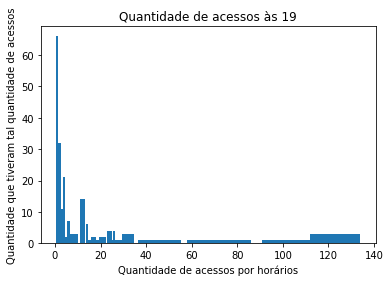

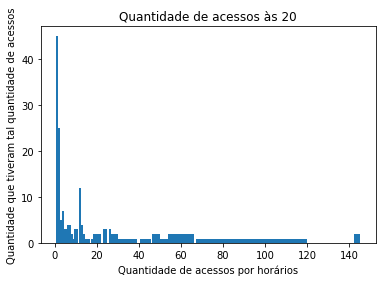

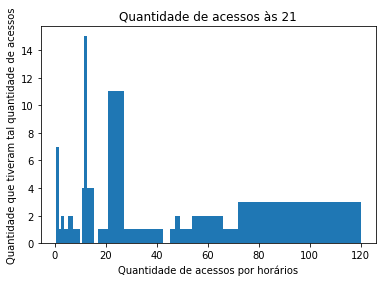

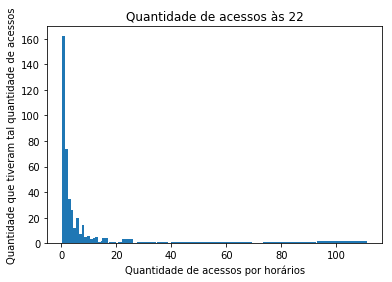

In [27]:
x = [i for i in range(7,23)]
oi = df_geral.groupby(['usuario','hora_pura']).count().reset_index()
oi['hora1'] = oi['hora_pura']

for valor in x:
    plt.title("Quantidade de acessos às " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(oi[oi['hora1'] == valor].maquina, bins = np.sort(oi[oi['hora1'] == valor].data.unique()),align="left")
    plt.show()



A partir dos gráficos foram gerados dataframes, foi possível identificar, visualmente, alguns comportamentos distintos do geral. E, novamente, os usuários foram divididos em dois grupos.

Os outliers foram olhados com maior atenção.

In [28]:
frames = [oi[(oi.hora_pura == 7) & (oi.data > 4)], oi[(oi.hora_pura == 8) & (oi.data > 5)], 
          oi[(oi.hora_pura == 9) & (oi.data > 15)], oi[(oi.hora_pura == 10) & (oi.data > 7)],
          oi[(oi.hora_pura == 11) & (oi.data > 19)], oi[(oi.hora_pura == 12) & (oi.data > 10)], 
          oi[(oi.hora_pura == 13) & (oi.data > 10)], oi[(oi.hora_pura == 14) & (oi.data > 60)],
          oi[(oi.hora_pura == 15) & (oi.data > 15)], oi[(oi.hora_pura == 16) & (oi.data > 8)],
          oi[(oi.hora_pura == 17) & (oi.data > 16)], oi[(oi.hora_pura == 18) & (oi.data > 6)], 
          oi[(oi.hora_pura == 19) & (oi.data > 5)], oi[(oi.hora_pura == 20) & (oi.data > 5)], 
          oi[(oi.hora_pura == 21) & (oi.data > 4)], oi[(oi.hora_pura == 22) & (oi.data > 10)]]
horario_outlier = pd.concat(frames)
horario_outlier.head()

,usuario,hora_pura,data,hora,maquina,sessao,ano,mes,dia,dia_da_semana,turno,intervalo,numero_maquina,outlier,duracao,hora1
181,-1370454813454764521,7,8,8,8,8,8,8,8,8,8,8,8,8,1,7
348,-1631698201876970577,7,5,5,5,5,5,5,5,5,5,5,5,5,0,7
1360,-3541908573582626761,7,25,25,25,25,25,25,25,25,25,25,25,25,5,7
1396,-3584603665688818833,7,9,9,9,9,9,9,9,9,9,9,9,9,1,7
1676,-417527712207776877,7,12,12,12,12,12,12,12,12,12,12,12,12,0,7


In [29]:
frames_dia_semana = [df_dia_semana[(df_dia_semana.dia_da_semana == 'Dom')],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Seg') & (df_dia_semana.sessao > 25)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Ter') & (df_dia_semana.sessao > 30)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Qua') & (df_dia_semana.sessao > 20)], # com muitas ressalvas
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Qui') & (df_dia_semana.sessao > 20)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Sex') & (df_dia_semana.sessao > 15)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Sab') & (df_dia_semana.sessao > 2)]]
dia_outlier = pd.concat(frames_dia_semana)
dia_outlier.head()

,usuario,dia_da_semana,data,hora,maquina,sessao,ano,mes,dia,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
139,-1543260643889497425,Dom,2,2,2,2,2,2,2,2,2,2,2,2,1
703,-3829900532284486707,Dom,9,9,9,9,9,9,9,9,9,9,9,9,4
876,-4797300600735849469,Dom,10,10,10,10,10,10,10,10,10,10,10,10,4
1018,-5569528191455735661,Dom,2,2,2,2,2,2,2,2,2,2,2,2,1
1059,-5747290438078533929,Dom,10,10,10,10,10,10,10,10,10,10,10,10,4


In [30]:
usuarios_outliers2 = pd.concat([dia_outlier[['usuario']], horario_outlier[['usuario']]])
usuarios_outliers2.head()

,usuario
139,-1543260643889497425
703,-3829900532284486707
876,-4797300600735849469
1018,-5569528191455735661
1059,-5747290438078533929


In [32]:
df_outliers2 = df_geral[df_geral["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers2

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,12:21:09,lcc2-15,closed,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,14:00:35,lcc2-19,closed,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,14:32:53,lcc2-05,closed,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
56834,16/03/2016,18:01:49,lcc2-01,closed,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,00:00:06
65646,08/08/2016,14:41:53,lcc2-12,closed,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,00:00:08
103582,27/07/2016,16:20:13,lcc2-40,closed,-7446963053336319563,2016,7,27,Qua,16,tarde,16h-18h,40,False,00:00:16
87938,11/08/2016,09:43:09,lcc2-03,closed,-1442416312388872333,2016,8,11,Qui,9,manha,08h-10h,3,False,00:00:36
5075,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,00:00:38
24907,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,00:00:38
35147,09/05/2016,14:12:52,lcc2-03,closed,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,00:01:05


In [33]:
df_outliers2.maquina.describe()

count       48752
unique         38
top       lcc2-13
freq         1819
Name: maquina, dtype: object

In [34]:
df_outliers2.turno.describe()

count     48752
unique        3
top       tarde
freq      27329
Name: turno, dtype: object

In [35]:
df_outliers2.dia_da_semana.describe()

count     48752
unique        7
top         Ter
freq      11644
Name: dia_da_semana, dtype: object

In [36]:
df_outliers2.hora_pura.describe()

count    48752.000000
mean        13.464391
std          3.066781
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         22.000000
Name: hora_pura, dtype: float64

In [39]:
df_outliers2.turno.describe()

count     48752
unique        3
top       tarde
freq      27329
Name: turno, dtype: object

In [40]:
df_outliers2.dia_da_semana.describe()

count     48752
unique        7
top         Ter
freq      11644
Name: dia_da_semana, dtype: object

In [41]:
df_outliers2.hora_pura.describe()

count    48752.000000
mean        13.464391
std          3.066781
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         22.000000
Name: hora_pura, dtype: float64

Comparando o comportamento de outliers com o uso mais comum do laboratório, nota-se que a hora de pico e dia da semana é o mesmo.

In [42]:
# usuarios que frequentam o lab de forma comum
df_outliers_excecoes = df_geral[~df_geral["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers_excecoes.maquina.describe(), df_outliers_excecoes.dia_da_semana.describe(), df_outliers_excecoes.hora_pura.describe()#(2237 usuarios)

(count        2116
 unique         38
 top       lcc2-03
 freq          129
 Name: maquina, dtype: object, count     2116
 unique       6
 top        Qua
 freq       470
 Name: dia_da_semana, dtype: object, count    2116.000000
 mean       13.676749
 std         3.157856
 min         7.000000
 25%        11.000000
 50%        14.000000
 75%        15.000000
 max        22.000000
 Name: hora_pura, dtype: float64)

In [ ]:
# usuarios que têm muitos acessos mas frequentam o lab de comum
df_outliers_excecoes = outliers[~outliers["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers_excecoes = outliers[outliers["usuario"].isin(df_outliers_excecoes["usuario"].unique())] 
df_outliers_excecoes.maquina.describe(),df_outliers_excecoes.dia_da_semana.describe(),df_outliers_excecoes.hora_pura.describe()

## K-Means

Utilizou-se o K-means para comparar os grupos formados pelo algoritmo com os encontrados na análise vendo tanto com número de acessos quanto com tempo de sessão, mas o resultado com o último não foi muito promissor.

In [44]:
df_acessos = df[["usuario","intervalo"]]
df_acessos_horarios = (df_acessos.groupby(["usuario","intervalo"]).size()).unstack().fillna(0)
X = df_acessos_horarios.values
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.cluster_centers_

array([[3.53956835e+00, 1.27827338e+02, 1.98028777e+02, 2.98338129e+02,
        2.89338129e+02, 1.83374101e+02, 1.31395683e+02],
       [6.57692308e+00, 2.26500000e+02, 3.80346154e+02, 7.56307692e+02,
        7.26769231e+02, 5.65961538e+02, 5.26692308e+02],
       [5.93975904e-01, 3.26542169e+01, 4.34698795e+01, 3.36710843e+01,
        3.67807229e+01, 2.48566265e+01, 1.85228916e+01]])

In [46]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,

1 95409472.08643216
2 46512959.10409634
3 32088034.636309933
4 26657131.24231948
5 22091210.363643378
6 20355068.245609544
7 18146790.638456814
8 16813984.539911002
9 16012939.62642708
10 15344025.905253505


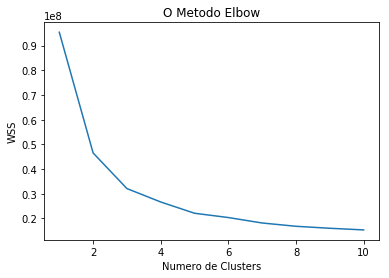

In [47]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

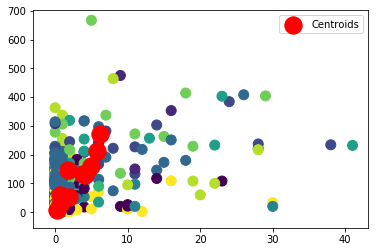

In [48]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()
plt.show()

In [51]:
df_duracao = df_geral[["usuario","duracao"]]
df_acessos_duracao = (df_duracao.groupby(["usuario","duracao"]).size()).unstack().fillna(0)
X = df_acessos_duracao.values
kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(X)
wcss = []

1 132103.10373444023
2 89465.15129434316
3 78743.89196150133
4 73092.54192167534
5 70515.2269880333
6 68144.0962225678
7 68461.10737391625
8 67166.31694230817
9 66314.70900326985
10 64710.52784726388


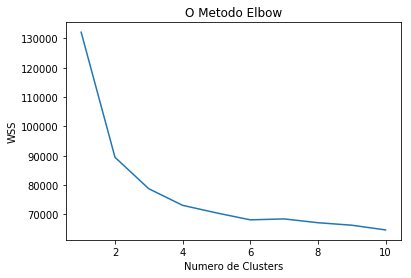

In [52]:
# kmeans por duracao de sessao
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

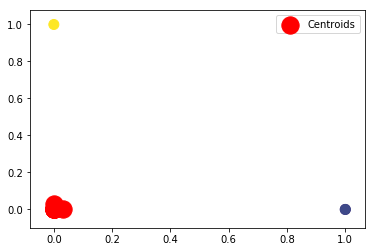

In [53]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()
plt.show()

In [40]:
from datetime import date, timedelta
from datetime import datetime
outliers.sort_values(by='data',inplace=True)
outliers.head()

qtdDiasIntervalo = 7

outliers_usuarios = outliers['usuario'].unique()
#iterando sobre cada usuario outlier
for usuario in outliers_usuarios:
    #selecionando apenas os dados do usuario do laço
    outLoop = outliers[outliers['usuario']==usuario].sort_values(by=['mes','dia','ano'])
    # definindo os meses que serão utilizados como padrão
    mesBase = outLoop.iloc[0]['mes'] + 2
    # data que definirá o intervalo a ser estudado
    ano= outLoop.iloc[0]['ano']
    mes= outLoop.iloc[0]['mes']
    dia= outLoop.iloc[0]['dia']
    data_Vez=date(ano,mes,dia)
    
    #pegando logs no intervalo de uma semana
    for index, logs in outLoop.iterrows():
        dataLaco = datetime.strptime(logs['data'], '%d/%m/%Y').date()
        if dataLaco.month > mesBase:
            break
        if (dataLaco -data_Vez).days <= qtdDiasIntervalo:
            print(logs)
        else:
            ano+=1
            mes+=1
            dia+=1
            data_Vez=date(ano,mes,dia)
    
    

data                       28/01/2016
hora                         09:50:29
maquina                       lcc2-32
usuario           8599754207183567627
ano                              2016
mes                                 1
dia                                28
dia_da_semana                     Qui
hora_pura                           9
turno                           manha
intervalo                     08h-10h
numero_maquina                     32
Name: 976, dtype: object
data                       28/01/2016
hora                         10:00:30
maquina                       lcc2-32
usuario           8599754207183567627
ano                              2016
mes                                 1
dia                                28
dia_da_semana                     Qui
hora_pura                          10
turno                           manha
intervalo                     10h-12h
numero_maquina                     32
Name: 986, dtype: object
data                       01/02/2016


ValueError: day is out of range for month

In [72]:
# todas as datas no intervalo que os usuarios outliers logaram 
data1 = outliers.sort_values(by='data').iloc[0]['data']
data2 = outliers.sort_values(by='data',ascending=False).iloc[0]['data']
intervaloDatas = pd.date_range(data1, data2)
outliersDatas = outliers['data'].unique()
desconsiderarDatas = set(intervaloDatas) - set(outliersDatas)